In [1]:
# Dependencies 
import numpy as np
import pandas as pd
import matplotlib as plt
import os
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns

In [2]:
listing = pd.read_csv('cleaned_listing.csv')
pd.set_option('max_columns', None)
listing = listing.drop(['host_name','Unnamed: 0', 'id', 'host_id'], axis=1)
listing.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,bathrooms_count,bathrooms_type,tv,video,refrigerator,oven,sound system,long term stays allowed,heating,kitchen,coffee,first aid kit,washer,drier,free parking,workspace,luggage dropoff allowed,parking,security camera,lock on bedroom door,outdoor furniture,elevator,backyard,BBQ grill,Air conditioning,Indoor fireplace,Outdoor dining area,fans,balcony,gym,Clothing storage,Breakfast,Children’s books and toys,heater,piano,game,Private hot tub,bike,Pets allowed,rental unit,Private,home,condo,hotel,apartment,townhouse,guest,Shared,Entire,aparthotel,cottage,loft
0,within an hour,0.9,0.98,1.0,1.0,1.0,1.0,1.0,Western Addition,37.77028,-122.43317,Entire home/apt,3,1.0,2.0,180,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,1,2,5,17,140,358,60,4,4.86,4.93,4.92,4.95,4.88,4.98,4.77,0,1,1,0,0,2.24,2008.0,1.0,bath,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,within a day,0.6,0.70,0.0,2.0,2.0,1.0,1.0,Bernal Heights,37.74474,-122.42089,Entire home/apt,4,2.0,2.0,235,30,60,30.0,30.0,60.0,60.0,30.0,60.0,1,30,60,90,365,111,0,0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0,1,1,0,0,0.68,2009.0,1.0,bath,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,within an hour,1.0,0.90,0.0,3.0,7.0,1.0,1.0,Outer Mission,37.73077,-122.44827,Private room,1,1.0,1.0,61,2,50,2.0,30.0,50.0,50.0,10.7,50.0,1,0,0,5,5,86,1,1,4.75,4.73,4.29,4.91,4.94,4.59,4.67,0,3,0,3,0,0.70,2009.0,2.0,shared bath,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,within an hour,1.0,1.00,0.0,6.0,12.0,1.0,1.0,Marina,37.79961,-122.42771,Entire home/apt,1,1.0,1.0,85,30,120,30.0,30.0,120.0,120.0,30.0,120.0,1,4,15,15,272,116,4,0,4.29,4.55,4.64,4.73,4.46,4.63,4.32,0,5,5,0,0,0.88,2011.0,1.0,bath,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,within a day,1.0,0.87,1.0,2.0,2.0,1.0,1.0,Outer Richmond,37.77988,-122.48488,Entire home/apt,4,1.0,2.0,146,3,90,3.0,3.0,90.0,90.0,3.0,90.0,1,6,24,54,323,211,26,3,4.65,4.91,4.73,4.92,4.93,4.66,4.63,0,2,2,0,0,1.72,2010.0,1.0,bath,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
#Normalize the dataset
listing = (listing - listing.mean()) / listing.std()
listing = listing.fillna(0)
listing

/tmp/ipykernel_75/279273070.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  listing = (listing - listing.mean()) / listing.std()


,Air conditioning,BBQ grill,Breakfast,Children’s books and toys,Clothing storage,Entire,Indoor fireplace,Outdoor dining area,Pets allowed,Private,Private hot tub,Shared,accommodates,aparthotel,apartment,availability_30,availability_365,availability_60,availability_90,backyard,balcony,bathrooms_count,bathrooms_type,bedrooms,beds,bike,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,coffee,condo,cottage,drier,elevator,fans,first aid kit,free parking,game,guest,gym,has_availability,heater,heating,home,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,host_response_time,host_since_year,host_total_listings_count,hotel,instant_bookable,kitchen,latitude,lock on bedroom door,loft,long term stays allowed,longitude,luggage dropoff allowed,maximum_maximum_nights,maximum_minimum_nights,maximum_nights,maximum_nights_avg_ntm,minimum_maximum_nights,minimum_minimum_nights,minimum_nights,minimum_nights_avg_ntm,neighbourhood_cleansed,number_of_reviews,number_of_reviews_l30d,number_of_reviews_ltm,outdoor furniture,oven,parking,piano,price,refrigerator,rental unit,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security camera,sound system,townhouse,tv,video,washer,workspace
0,-0.448507,2.328225,-0.267019,0.0,1.608878,0.760658,-0.407995,-0.391326,-0.058452,-0.589461,-0.1069,-0.113379,-0.085332,-0.1091,6.718323,-0.629816,-0.156984,-0.770920,-0.626178,1.505183,1.552546,-0.442540,0,-0.625616,0.166684,-0.095175,-0.407439,-0.284887,-0.386150,-0.107921,0.760151,-0.411345,-0.052856,0.0,-0.46386,-0.37539,0.982734,0.938644,-0.294303,-0.319958,-0.386314,0.190387,0.291499,0.339579,-0.587315,0.483611,0.111364,0.387257,1.261888,-0.191506,-0.510665,0,-2.323253,-0.204209,-0.319076,-0.738492,0.536263,0.128643,-0.540089,-0.100024,0.469762,-0.087619,1.419705,-0.058459,-0.324110,-0.046850,-0.058106,-0.051368,-0.365044,-0.401385,-0.326105,0,3.336857,1.342800,2.167076,2.160080,1.084943,0.695182,-0.127906,-0.122637,0.711407,-0.712888,0.302477,0.225367,0.375859,0.072432,0.492850,0.228590,0.250141,0.398564,0,-0.607114,-0.264013,-0.123459,0.446016,-0.364575,0.591606,-0.879840
1,-0.448507,-0.429445,-0.267019,0.0,-0.621455,0.760658,-0.407995,-0.391326,-0.058452,-0.589461,-0.1069,-0.113379,0.435695,-0.1091,-0.148824,2.185416,1.594686,1.834972,1.613639,-0.664268,-0.644004,-0.442540,0,0.518479,0.166684,-0.095175,-0.407439,-0.284887,-0.386150,-0.107921,-1.315325,-0.411345,-0.052856,0.0,-0.46386,-0.37539,0.982734,-1.065202,-0.294303,-0.319958,-0.386314,0.190387,0.291499,0.339579,-0.587315,-0.850218,0.111364,0.387257,-0.792341,-0.189811,-2.974168,0,-1.995707,-0.202656,-0.319076,-0.738492,0.536263,-0.930382,-0.540089,-0.100024,0.469762,0.358135,-0.704263,-0.058468,-0.085055,-0.044440,-0.058115,-0.051377,0.068411,0.100291,-0.079658,0,0.670875,-0.458568,-0.465900,-0.462874,-0.921565,-1.438250,-0.127906,0.244761,-1.405447,1.402527,0.087589,0.035786,0.251415,-0.009843,-0.049687,0.269270,0.037993,-0.348672,0,-0.607114,-0.264013,-0.123459,-2.241727,-0.364575,0.591606,-0.879840
2,-0.448507,-0.429445,-0.267019,0.0,-0.621455,-1.314448,-0.407995,-0.391326,-0.058452,1.696203,-0.1069,-0.113379,-1.127387,-0.1091,-0.148824,-0.830904,-1.207986,-1.007820,-0.994367,1.505183,-0.644004,0.878729,0,-0.625616,-0.661757,-0.095175,-0.344583,-0.317065,-0.071938,-0.107921,0.760151,-0.411345,-0.052856,0.0,-0.46386,-0.37539,0.982734,-1.065202,-0.294303,-0.319958,-0.386314,0.190387,0.291499,0.339579,1.702399,0.102517,0.111364,0.387257,-0.792341,-0.188117,0.310502,0,-1.995707,-0.194891,-0.319076,-0.738492,0.536263,-1.509653,1.851259,-0.100024,0.469762,-0.635736,1.419705,-0.058468,-0.085055,-0.045244,-0.058115,-0.051378,-0.365044,-0.401385,-0.249530,0,0.401038,-0.008226,-0.422017,-0.462

In [4]:
# Define X_train, X_test, y_train, y_test
X = listing.drop(columns=['price'])
y = listing['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

X_train

,Air conditioning,BBQ grill,Breakfast,Children’s books and toys,Clothing storage,Entire,Indoor fireplace,Outdoor dining area,Pets allowed,Private,Private hot tub,Shared,accommodates,aparthotel,apartment,availability_30,availability_365,availability_60,availability_90,backyard,balcony,bathrooms_count,bathrooms_type,bedrooms,beds,bike,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,coffee,condo,cottage,drier,elevator,fans,first aid kit,free parking,game,guest,gym,has_availability,heater,heating,home,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,host_response_time,host_since_year,host_total_listings_count,hotel,instant_bookable,kitchen,latitude,lock on bedroom door,loft,long term stays allowed,longitude,luggage dropoff allowed,maximum_maximum_nights,maximum_minimum_nights,maximum_nights,maximum_nights_avg_ntm,minimum_maximum_nights,minimum_minimum_nights,minimum_nights,minimum_nights_avg_ntm,neighbourhood_cleansed,number_of_reviews,number_of_reviews_l30d,number_of_reviews_ltm,outdoor furniture,oven,parking,piano,refrigerator,rental unit,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security camera,sound system,townhouse,tv,video,washer,workspace
2126,-0.448507,-0.429445,-0.267019,0.0,-0.621455,0.760658,-0.407995,-0.391326,-0.058452,-0.589461,-0.106900,-0.113379,-0.606360,-0.1091,-0.148824,-0.629816,1.236567,-0.344501,0.202248,-0.664268,-0.644004,-0.442540,0,0.000000,-0.661757,-0.095175,0.503971,0.648266,-0.386150,-0.107921,-1.315325,-0.411345,-0.052856,0.0,-0.463860,-0.375390,-1.017412,-1.065202,-0.294303,-0.319958,-0.386314,0.190387,0.291499,0.339579,-0.587315,-0.278577,0.111364,0.387257,-0.792341,-0.135588,0.310502,0,0.624665,-0.143644,-0.319076,-0.738492,0.536263,-0.018145,-0.540089,-0.100024,0.469762,-0.539906,-0.704263,-0.058459,-0.085055,0.041122,-0.058106,-0.051368,0.068411,0.100291,-0.079658,0,-0.386883,-0.458568,-0.465900,-0.462874,-0.921565,-1.438250,-0.127906,-1.405447,1.402527,-1.174881,-1.796828,-1.341476,-2.121569,0.337840,-1.357927,-1.211319,-0.559431,0,-0.607114,-0.264013,-0.123459,0.446016,-0.364575,0.591606,-0.879840
6036,2.229272,-0.429445,-0.267019,0.0,-0.621455,0.760658,-0.407995,-0.391326,-0.058452,-0.589461,-0.106900,-0.113379,0.435695,-0.1091,-0.148824,1.984328,-0.561814,1.740213,1.552275,-0.664268,-0.644004,-0.442540,0,-0.625616,-0.661757,-0.095175,-0.344583,-0.220532,-0.386150,-0.107921,-1.315325,-0.411345,-0.052856,0.0,-0.463860,-0.375390,0.982734,-1.065202,-0.294303,-0.319958,-0.386314,0.190387,0.291499,0.339579,-0.587315,-2.755687,0.111364,0.387257,-0.792341,0.457473,-0.100082,0,2.262397,0.390570,-0.319076,-0.738492,-1.864469,0.862994,-0.540089,-0.100024,0.469762,0.635823,-0.704263,-0.058465,-0.324110,-0.019937,-0.058112,-0.051375,-0.365044,-0.401385,-0.326105,0,-0.516405,-0.458568,-0.422017,-0.462874,-0.921565,-1.438250,-0.127906,-1.405447,1.402527,0.490505,0.383351,0.574971,0.401532,-2.038989,0.513350,0.792295,-0.334302,0,-0.607114,-0.264013,-0.123459,0.446016,-0.364575,-1.690052,-0.879840
2264,-0.448507,-0.429445,-0.267019,0.0,1.608878,-1.314448,-0.407995,-0.391326,-0.058452,-0.589461,-0.106900,-0.113379,-0.606360,-0.1091,-0.148824,1.280520,-0.258191,1.408553,1.337498,-0.664268,-0.644004,-0.442540,0,0.000000,-0.661757,-0.095175,1.478237,-0.317065,4.850721,-0.107921,-1.315325,-0.411345,-0.052856,0.0,-0.463860,-0.375390,0.982734,-1.065202,-0.294303,-0.319958,-0.386314,0.190387,0.291499,0.339579,-0.587315,0.578885,0.111364,0.387257,-0.792341,-0.089838,-1.331833,0,0.952211,-0.107926,3.133568,1.353902,-1.864469,0.860920,-0.540089,-0.100024,-2.128408,0.835831,-0.704263,-0.058460,-0.332648,-0.047574,-0.058107,-0.051378,-0.380524,-0.419302,-0.334907,0,-0.473231,-0.458568,-0.3

## Linear Regression

In [5]:
#Calculate VIFs and removing lots of columns with large VIFs
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns) + 1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index = columns)
import copy

x_cols = list(X_train.columns.values)

In [6]:
vif = VIF(X_train, x_cols)
vif_over_10 = vif[vif > 10]
i = 0
while vif_over_10.size > 0:
    nextRemove = vif_over_10.sort_values(ascending=False).index[0]
    x_cols.remove(nextRemove)
    print(nextRemove)
    vif = VIF(X_train, x_cols)
    vif_over_10 = vif[vif>10]
    i += 1
print(i)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


calculated_host_listings_count
minimum_nights_avg_ntm
maximum_nights_avg_ntm
host_listings_count
Entire
availability_60
maximum_minimum_nights
rental unit
8


In [7]:
#No more variables with high VIFs
new_X_train = X_train[x_cols]

#VIF(X_train, cols.remove('price'))
linreg_model = sm.OLS(y_train, new_X_train).fit()

In [8]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [9]:
new_X_test = X_test[x_cols]

rsquared_linreg = OSR2(linreg_model, new_X_test, y_test, y_train)
rsquared_linreg

0.4194503304595154

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

y_pred_linear = linreg_model.predict(new_X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = math.sqrt(mse_linear)

print('MSE for Linear Regression:', mse_linear)
print('MAE for Linear Regression:', mae_linear)
print('RMSE for Linear Regression:', rmse_linear)

MSE for Linear Regression: 0.5634100368789112
MAE for Linear Regression: 0.4818404632609875
RMSE for Linear Regression: 0.7506064460680518


## CART

In [11]:
import sklearn.model_selection
sklearn.model_selection.KFold

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201)}

dtr_a = DecisionTreeRegressor()
cv = sklearn.model_selection.KFold(n_splits = 5, random_state = 88, shuffle = True)
dtr_a = GridSearchCV(dtr_a, param_grid = grid_values, scoring = 'r2', cv = cv, verbose = 1) 
dtr_a.fit(X_train, y_train)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017...
       0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755,
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ])},
             scoring='r2', verbose=1)

In [12]:
print(dtr_a.best_params_)

{'ccp_alpha': 0.0115}


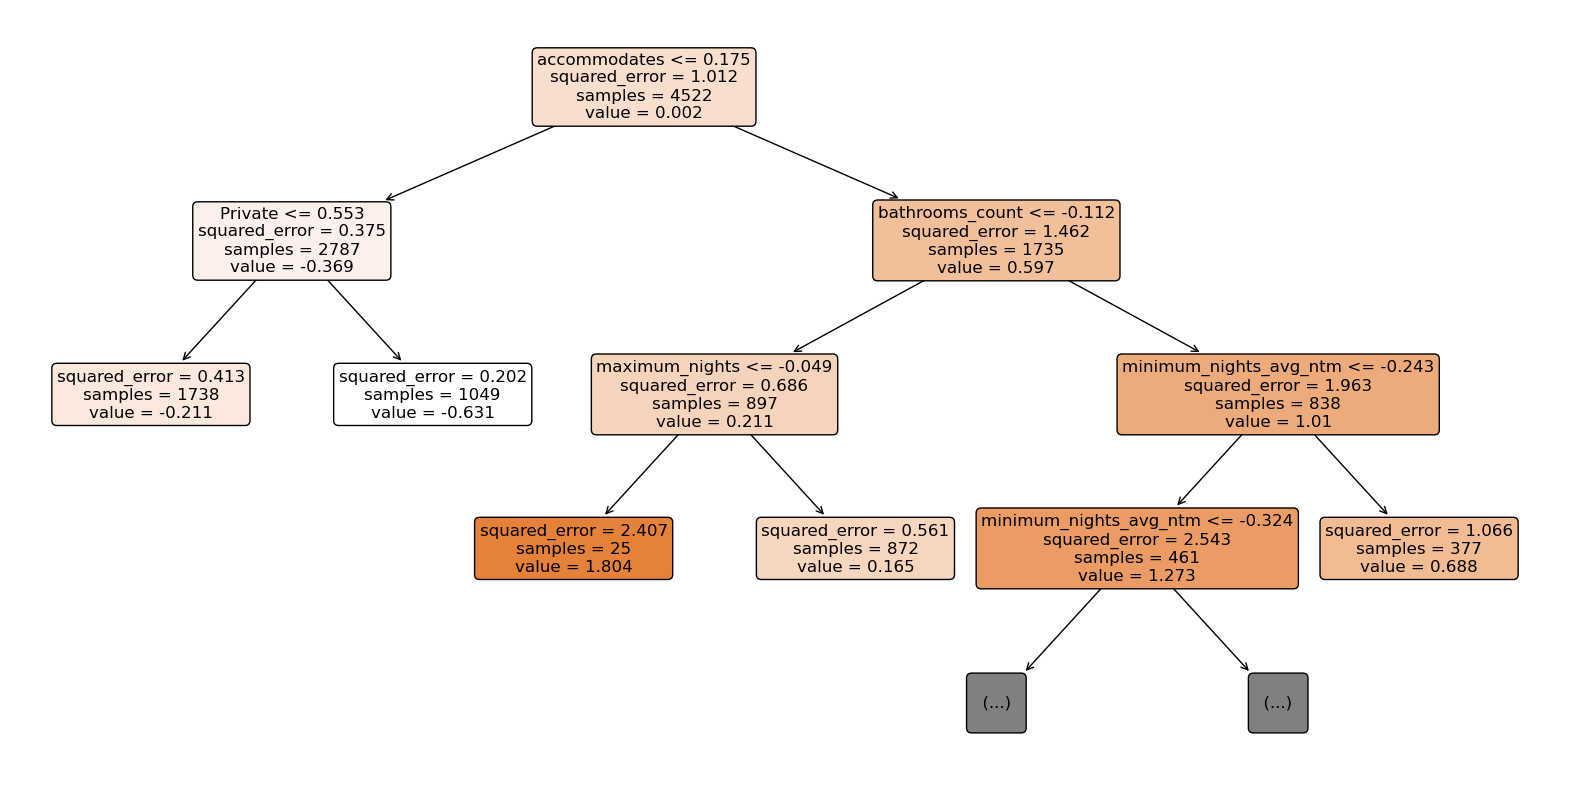

In [13]:
plt.figure(figsize=(20,10))
plot_tree(dtr_a.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [14]:
print('OSR2:', OSR2(dtr_a, X_test, y_test, y_train))

OSR2: 0.34466157967005173


In [15]:
y_pred_cart = dtr_a.predict(X_test)

mse_cart = mean_squared_error(y_test, y_pred_cart)
mae_cart = mean_absolute_error(y_test, y_pred_cart)
rmse_cart = math.sqrt(mse_cart)

print('MSE for CART:', mse_cart)
print('MAE for CART:', mae_cart)
print('RMSE for CART:', rmse_cart)

MSE for CART: 0.6359907910351773
MAE for CART: 0.5399595990955717
RMSE for CART: 0.7974903078001496


## Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
# cross validation for random forest
grid_values = {'min_samples_leaf': [1,3,5], 
               'max_features': np.linspace(1,8,8, dtype='int32'),
               'random_state': [88]} 

rf_a = RandomForestRegressor() 
cv = sklearn.model_selection.KFold(n_splits = 5, random_state = 88, shuffle = True)
rf_cv_a = GridSearchCV(rf_a, param_grid=grid_values, cv=cv)
rf_cv_a.fit(X_train, y_train)


print('Best parameters', rf_cv_a.best_params_)

Best parameters {'max_features': 8, 'min_samples_leaf': 1, 'random_state': 88}


In [17]:
print('RF OSR2:', round(OSR2(rf_cv_a, X_test, y_test, y_train), 5))

RF OSR2: 0.57699


In [18]:
y_pred_rf = rf_cv_a.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = math.sqrt(mse_rf)

print('MSE for RF:', mse_rf)
print('MAE for RF:', mae_rf)
print('RMSE for RF:', rmse_rf)

MSE for RF: 0.4105228923605135
MAE for RF: 0.3725110353493167
RMSE for RF: 0.6407206039768921


## Bagging

In [54]:
from sklearn.ensemble import RandomForestRegressor

bag_a = RandomForestRegressor(max_features=20, random_state = 88)
bag_a.fit(X_train, y_train)

RandomForestRegressor(max_features=20, random_state=88)

In [55]:
print('OSR2:', round(OSR2(bag_a, X_test, y_test, y_train), 5))

OSR2: 0.58396


In [56]:
y_pred_bag = bag_a.predict(X_test)

mse_bag = mean_squared_error(y_test, y_pred_bag)
mae_bag = mean_absolute_error(y_test, y_pred_bag)
rmse_bag = math.sqrt(mse_bag)

print('MSE for Bagging:', mse_bag)
print('MAE for Bagging:', mae_bag)
print('RMSE for Bagging:', rmse_bag)

MSE for Bagging: 0.40375996964191446
MAE for Bagging: 0.36559297276692865
RMSE for Bagging: 0.6354210963148096


## Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=10, min_samples_leaf=10, random_state=88, verbose=1) 
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0119           36.28s
         2           1.0113           36.16s
         3           1.0107           36.23s
         4           1.0102           36.15s
         5           1.0096           36.17s
         6           1.0091           36.29s
         7           1.0085           36.38s
         8           1.0080           36.49s
         9           1.0074           36.47s
        10           1.0069           36.42s
        20           1.0014           36.25s
        30           0.9960           36.08s
        40           0.9908           35.94s
        50           0.9856           35.93s
        60           0.9806           35.65s
        70           0.9756           35.50s
        80           0.9708           35.31s
        90           0.9660           35.11s
       100           0.9613           34.91s
       200           0.9198           33.32s
       300           0.8855           31.79s
       40

GradientBoostingRegressor(learning_rate=0.001, max_depth=10, max_leaf_nodes=3,
                          min_samples_leaf=10, n_estimators=2000,
                          random_state=88, verbose=1)

In [23]:
print('OSR2:', round(OSR2(gbr, X_test, y_test, y_train), 5))

OSR2: 0.35129


In [24]:
y_pred_boosting = gbr.predict(X_test)

mse_boosting = mean_squared_error(y_test, y_pred_boosting)
mae_boosting = mean_absolute_error(y_test, y_pred_boosting)
rmse_boosting = math.sqrt(mse_boosting)

print('MSE for Boosting:', mse_boosting)
print('MAE for Boosting:', mae_boosting)
print('RMSE for Boosting:', rmse_boosting)

MSE for Boosting: 0.6295543530146601
MAE for Boosting: 0.5400612467120243
RMSE for Boosting: 0.7934446124428977


## Neural Network

In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC

mlp = MLPRegressor(hidden_layer_sizes=(3), activation='relu',
                     solver='lbfgs',  random_state=88)
mlp.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=3, random_state=88, solver='lbfgs')

In [26]:
print('R^2 training: {:.3f}'.format(mlp.score(X_train, y_train)))

R^2 training: 0.538


In [27]:
print('R^2 testing: {:.3f}'.format(mlp.score(X_test, y_test)))

R^2 testing: 0.485


In [28]:
y_pred_mlp = mlp.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = math.sqrt(mse_mlp)

print('MSE for Neural Network:', mse_mlp)
print('MAE for Neural Network:', mae_mlp)
print('RMSE for Neural Network:', rmse_mlp)

MSE for Neural Network: 0.49975115127595815
MAE for Neural Network: 0.4466638522348617
RMSE for Neural Network: 0.7069307966668011


## KNN

In [29]:
from sklearn.neighbors import KNeighborsRegressor

min_ = []
for k in range(1,10):
  knn_model = KNeighborsRegressor(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  min_.append(knn_model.score(X_test, y_test))
min_

[0.08484181064660046,
 0.30817849893553984,
 0.37131904851449016,
 0.38412286653671734,
 0.39248135222994174,
 0.4036123619609433,
 0.401577137481515,
 0.39908837469294434,
 0.40422373630289654]

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
print('R^2 training: {:.3f}'.format(knn_model.score(X_train, y_train)))
print('R^2 test: {:.3f}'.format(knn_model.score(X_test, y_test)))

R^2 training: 0.590
R^2 test: 0.392


In [31]:
y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = math.sqrt(mse_knn)

print('MSE for KNN:', mse_knn)
print('MAE for KNN:', mae_knn)
print('RMSE for KNN:', rmse_knn)

MSE for KNN: 0.5895654759315148
MAE for KNN: 0.4616169117013767
RMSE for KNN: 0.767831671612675


In [35]:
r2_linear = OSR2(linreg_model, new_X_test, y_test, y_train)
r2_cart = OSR2(dtr_a, X_test, y_test, y_train)
r2_rf = OSR2(rf_cv_a, X_test, y_test, y_train)
r2_bagging = OSR2(bag_a, X_test, y_test, y_train)
r2_boosting = OSR2(gbr, X_test, y_test, y_train)
r2_neural = mlp.score(X_test, y_test)
r2_knn = knn_model.score(X_test, y_test)

In [38]:
data_2 = [['Linear Regression', r2_linear, mae_linear, rmse_linear], ['CART', r2_cart, mae_cart, rmse_cart], ['Random Forest', r2_rf, mae_rf, rmse_rf], ['Bagging', r2_bagging, mae_bag, rmse_bag], ['Boosting', r2_boosting, mae_boosting, rmse_boosting], ['Neural Networ', r2_neural, mae_mlp, rmse_mlp], ['KNN', r2_knn, mae_knn, rmse_knn]]

df_2 = pd.DataFrame(data_2, columns=['Model', 'R2', 'MAE', 'RMSE'])
df_2

,Model,R2,MAE,RMSE
0,Linear Regression,0.419450,0.481840,0.750606
1,CART,0.344662,0.539960,0.797490
2,Random Forest,0.576988,0.372511,0.640721
3,Bagging,0.583957,0.365593,0.635421
4,Boosting,0.351294,0.540061,0.793445
5,Neural Networ,0.485031,0.446664,0.706931
6,KNN,0.392481,0.461617,0.767832


## Bootstrap

In [39]:
pip install bootstrapped

  Using cached bootstrapped-0.0.2-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


## Performance Report

In [40]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [50]:
output = np.zeros([50, 5])

model_list = [dtr_a, rf_cv_a, bag_a, gbr, mlp, knn_model]

In [57]:
def perform_bootstrap(test_data, test_label, model_list, sample=500, random_state=88): 
    dic = {}
    n_sample = sample
    n_model = len(model_list)
    output_array=np.zeros([n_sample, n_model])
    output_array[:]=np.nan
    for model_iter in range(n_model):
        model = model_list[model_iter]
        for bs_iter in range(n_sample):
            bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
            bs_data = test_data.loc[bs_index]
            bs_label = test_label.loc[bs_index]
            bs_predicted = model.predict(bs_data)
            #output_array[bs_iter, model_iter]=(bs_predicted==bs_label).mean()
            output_array[bs_iter, model_iter]= mean_squared_error(bs_label, bs_predicted)
            value = output_array[:, model_iter]
            dic.update({model:value})
    return dic

In [79]:
dict = perform_bootstrap(X_test, y_test, model_list, sample=500, random_state = 88)

In [90]:
dict_cop = dict.copy()

In [103]:
#model_list = [dtr_a, rf_cv_a, bag_a, gbr, mlp, knn_model]
df.rename(columns={df.columns[0]: 'CART', df.columns[1]: 'Random Forest', df.columns[2]: 'Bagging', 
                  df.columns[3]: 'Boosting', df.columns[4]: 'Neural Network', df.columns[5]: 'KNN'},inplace=True)
df

,CART,Random Forest,Bagging,Boosting,Neural Network,KNN
0,0.704233,0.345869,0.398961,0.569281,0.457137,0.555762
1,0.637428,0.392607,0.416431,0.588624,0.509932,0.582695
2,0.572989,0.397613,0.402377,0.616919,0.531235,0.634802
3,0.623320,0.460455,0.440466,0.657750,0.484827,0.632798
4,0.620677,0.414199,0.422520,0.625790,0.566258,0.630835
...,...,...,...,...,...,...
495,0.656543,0.404894,0.404169,0.675253,0.553438,0.644692
496,0.621182,0.449123,0.391303,0.637481,0.482759,0.587548
497,0.623622,0.357881,0.432724,0.633902,0.465889,0.601220
498,0.655271,0.419885,0.373360,0.585131,0.543934,0.614253


<AxesSubplot:xlabel='MSE', ylabel='Count'>

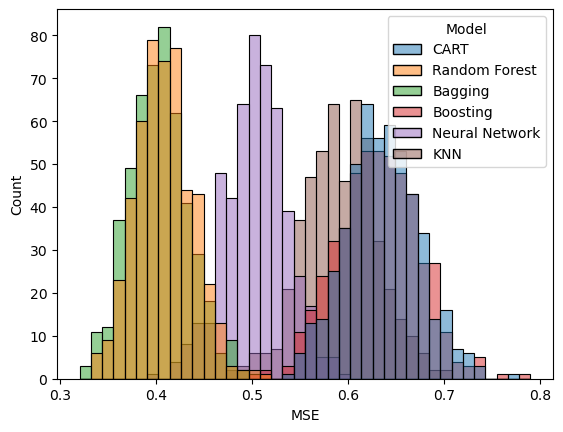

In [104]:
import seaborn as sns

hist = df.stack().reset_index()
hist = hist.rename(columns = {"level_0":"Trail Number", "level_1":"Model", 0:'MSE'})

sns.histplot(data=hist, x='MSE', hue='Model', bins=40)